# U1T2



# Assignment 2 Unit 1
### The proposed assignment aims to reinforce graph concepts using the NetworkX library in Python.

#### Students: Gabriel Vitor Pereira dos Santos and João Victor Soares da Silva Vieira.

#### Step-by-step guide:

1. Import the necessary libraries;
2. Define global variables;
3. Add edges between all co-authors of an article and create combinations of pairs of authors to add edges to the graph;
4. Draw the graph.

In [ ]:
# Import the necessary libraries
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [ ]:
# Global variables
csv_file_path = 'scopus.csv'
x_neighbors = 3

In [ ]:
data = pd.read_csv(csv_file_path)

G = nx.Graph()

def add_authors_edges(authors_str: str) -> None:
  '''
  Add the colaboration between the authors (edges) in the graph.

  Parameters:
      authors_str (str): The authors that will be added on the graph.

  Returns:
      None
  '''
  authors = [author.strip() for author in authors_str.split(";")]

  for author1, author2 in itertools.combinations(authors, 2):
      G.add_edge(author1, author2)

def generate_subgraph_with_neighbor_verctices(min_neighbors: int):
  '''
    Returns a subgraph with only the nodes that have at least min_neighbors neighbors.

    Parameters:
        min_neighbors (int): The minimum neighbors number.

    Returns:
        Subgraph(G): The subgraph with the filtered nodes.
  '''
  filtered_nodes = [node for node in G.nodes() if G.degree(node) >= min_neighbors]
  return G.subgraph(filtered_nodes)

data['Authors'].apply(add_authors_edges)

,Authors
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


Número de autores: 31
Número de colaborações: 40


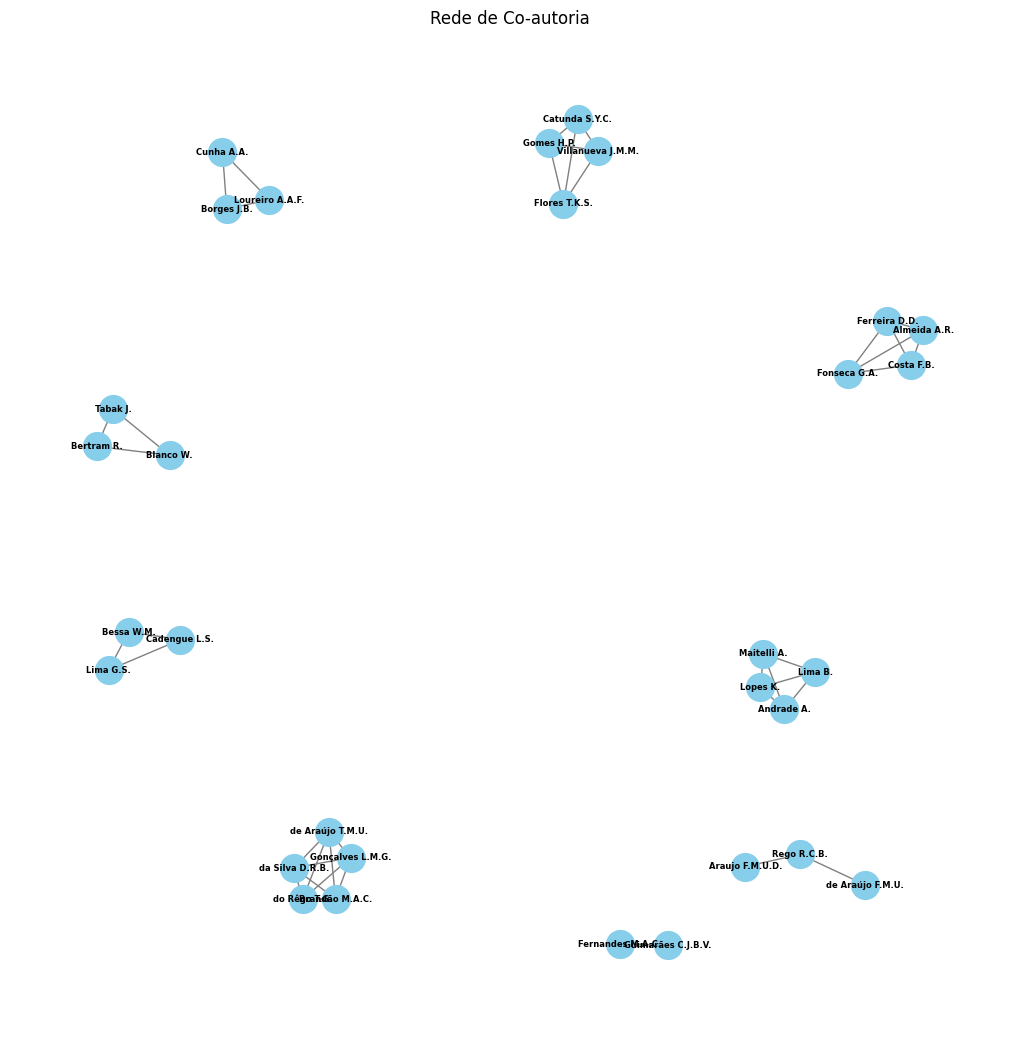

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Número de autores: {num_nodes}")
print(f"Número de colaborações: {num_edges}")

# Plot the co-author graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=400, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')
plt.title('Rede de Co-autoria')
plt.show()

Densidade do grafo: 0.0860
Densidade do sub-grafo com pelo menos 3 vizinhos: 0.2059


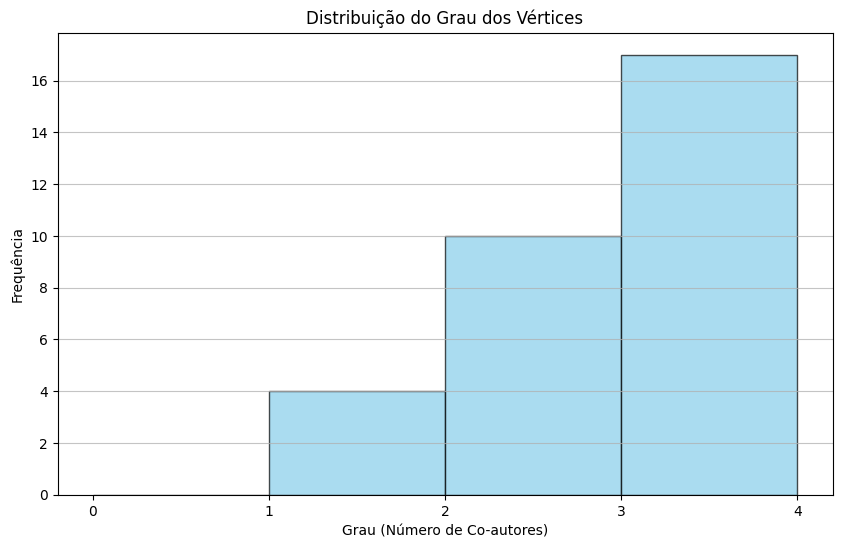

In [ ]:
density = nx.density(G)
print(f"Densidade do grafo: {density:.4f}")

# Creates the subgraph and shows his density
subgraph = generate_subgraph_with_neighbor_verctices(min_neighbors=x_neighbors)
subgraph_density = nx.density(subgraph)
print(f"Densidade do sub-grafo com pelo menos {x_neighbors} vizinhos: {subgraph_density:.4f}")

# Histogram
degrees = [G.degree(node) for node in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(max(degrees) + 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Grau dos Vértices')
plt.xlabel('Grau (Número de Co-autores)')
plt.ylabel('Frequência')
plt.xticks(range(max(degrees) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()